## GPS errors

According to Grow staff, the main cause of data pollution is the quality of GPS outputs. 

**Reasonable expected pattern:** 2 or (preferably) 3 takes by minute


### Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

from yellow import trips as yt
from yellow import plots

### Input data

In [2]:
trips = pd.read_csv('~/saida.csv')
cities = pd.read_csv('~/cities.csv')
stats = pd.read_csv('~/traj-stats.csv')

trips = trips.merge(cities[cities.city == 'São Paulo'], on='tripid') \
        .merge(stats[(stats.total_distance > 0) & (stats.total_duration > 0)], on='tripid')

trips['start_time'] = yt.extract_start_times(trips)
trips['avg_speed'] = trips.total_distance / trips.total_duration * 3.6

### GPS rate

In [3]:
trips['takes_by_min'] = trips.num_takes / (trips.total_duration/60)
trips.takes_by_min.describe()

count    296054.000000
mean         38.527637
std         574.088175
min           0.000464
25%           6.178986
50%          10.388754
75%          12.199149
max      120008.698140
Name: takes_by_min, dtype: float64

In [4]:
stat = trips.takes_by_min
plt.figure(figsize=(20, 10))
plots.dist_chart(stat[stat < 40], 'GPS rates', 'takes by minute')
plt.show()

In [49]:
selected = trips[(trips.takes_by_min < 1000) & (trips.total_duration < 250*60)]
plt.figure(figsize=(20, 10))
plt.xlabel('takes by minute')
plt.ylabel('trip duration (min)')
plt.scatter(selected.takes_by_min, selected.total_duration/60, alpha=0.3)
plt.show()

In [50]:
selected = trips[(trips.takes_by_min < 1000) & (trips.total_distance < 200*1000)]
plt.figure(figsize=(20, 10))
plt.xlabel('takes by minute')
plt.ylabel('travelled distance (km)')
plt.scatter(selected.takes_by_min, selected.total_distance/1000, alpha=0.3)
plt.show()

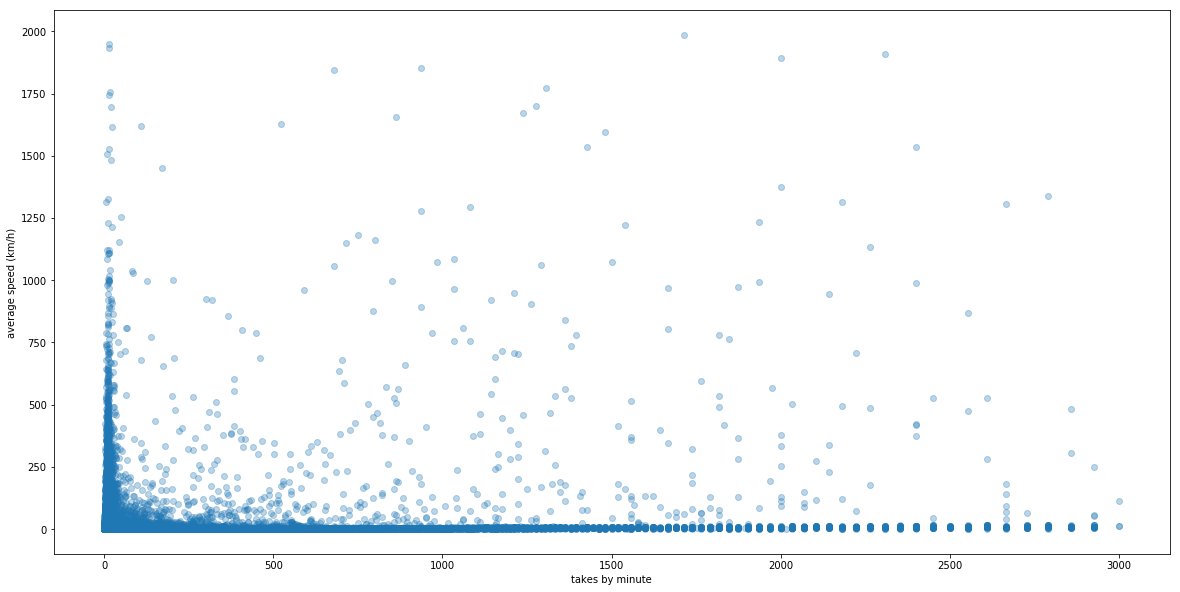

In [51]:
selected = trips[(trips.takes_by_min < 3000) & (trips.avg_speed < 2000)]
plt.figure(figsize=(20, 10))
plt.xlabel('takes by minute')
plt.ylabel('average speed (km/h)')
plt.scatter(selected.takes_by_min, selected.avg_speed, alpha=0.3)
plt.show()

#### Zeros?

In [5]:
len(trips.takes_by_min[trips.takes_by_min == 0])

0

#### Small values

In [52]:
small_rates = trips[trips.takes_by_min < 2]
len(small_rates)

16730

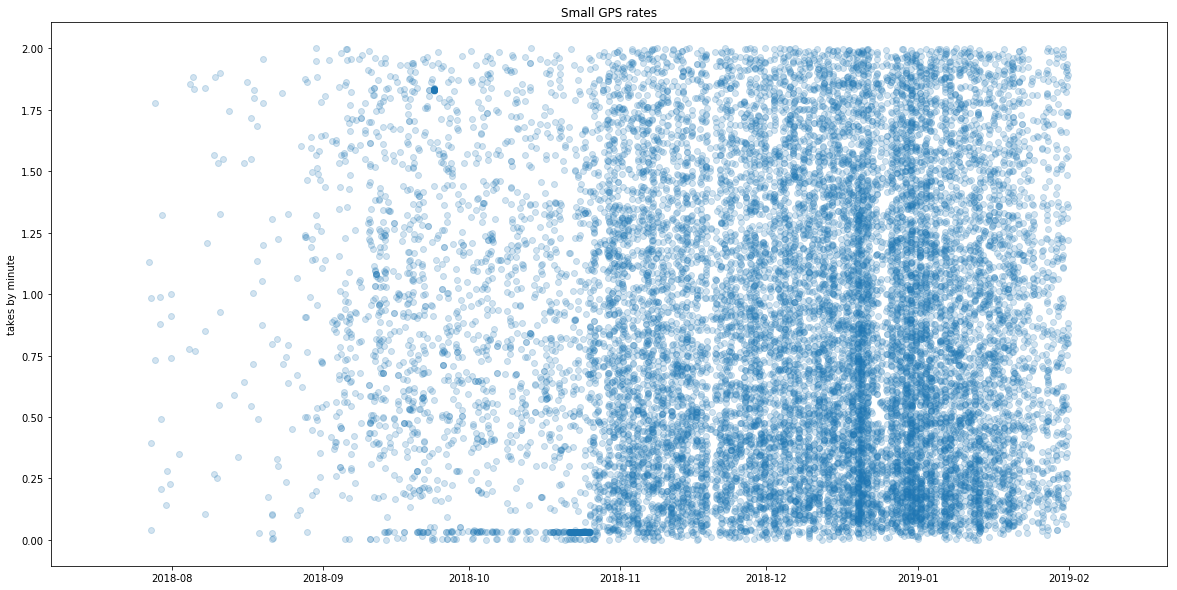

In [53]:
plt.figure(figsize=(20, 10))
plots.time_scatter(small_rates.takes_by_min, 'Small GPS rates', 'takes by minute', small_rates.start_time)
plt.show()

count    16730.000000
mean        73.479277
std        651.872211
min          1.000367
25%          7.396300
50%         18.485158
75%         57.788183
max      42621.611833
Name: total_duration, dtype: float64

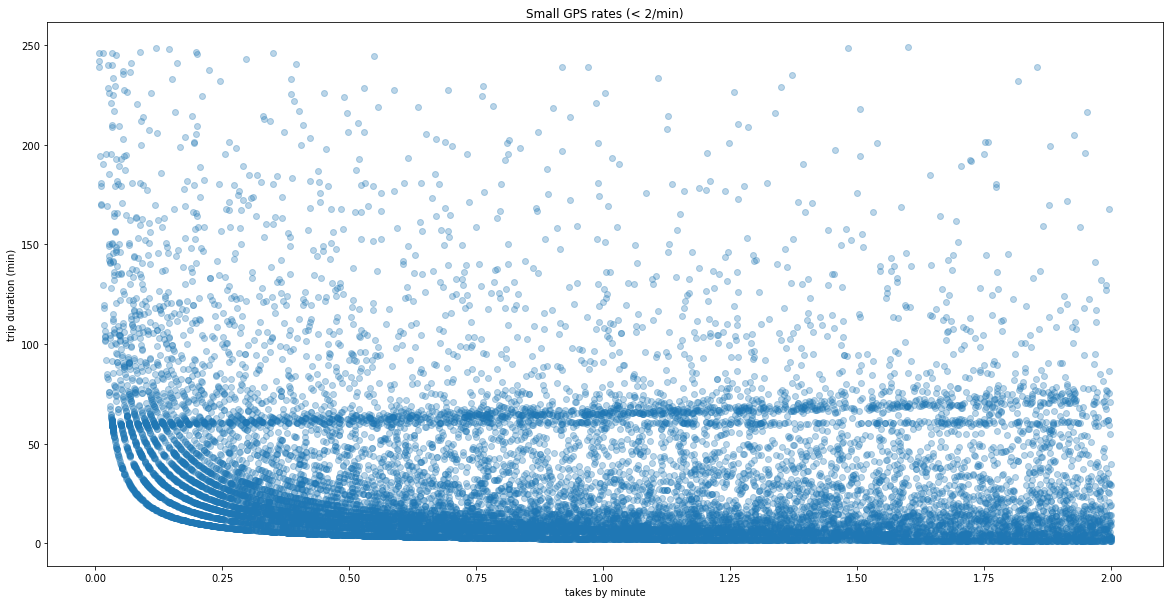

In [59]:
display((small_rates.total_duration/60).describe())
selected = small_rates[small_rates.total_duration < 250*60]
plt.figure(figsize=(20, 10))
plt.title('Small GPS rates (< 2/min)')
plt.xlabel('takes by minute')
plt.ylabel('trip duration (min)')
plt.scatter(selected.takes_by_min, selected.total_duration/60, alpha=0.3)
plt.show()

count    1.673000e+04
mean     1.879674e+00
std      5.180642e+00
min      3.536620e-13
25%      3.311342e-01
50%      9.592313e-01
75%      1.925148e+00
max      2.498525e+02
Name: total_distance, dtype: float64

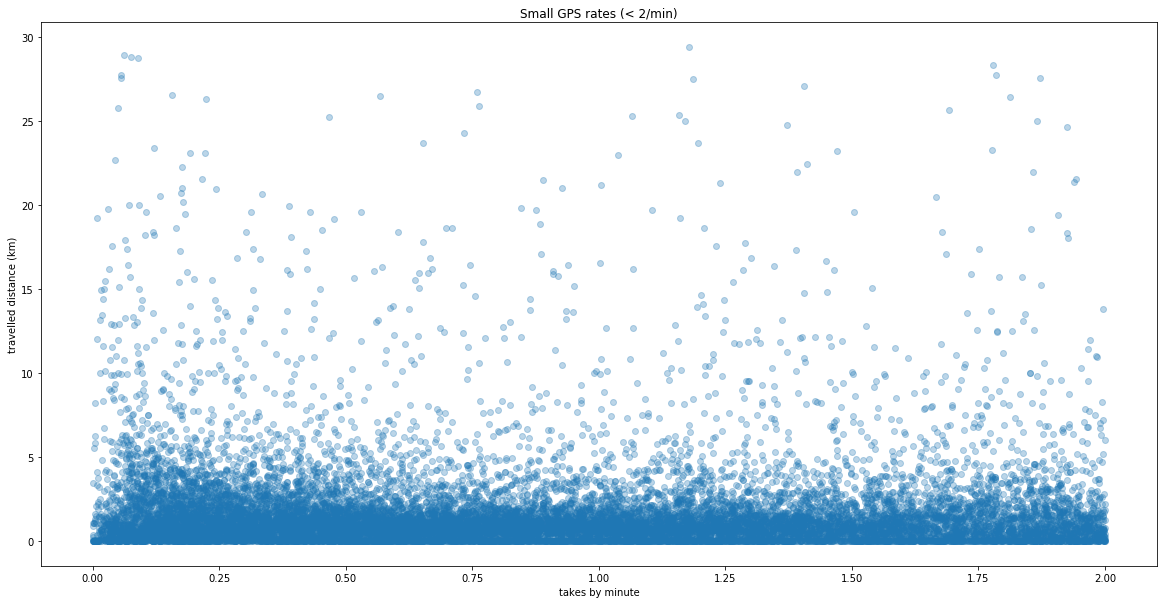

In [64]:
display((small_rates.total_distance/1000).describe())
selected = small_rates[small_rates.total_distance < 30*1000]
plt.figure(figsize=(20, 10))
plt.title('Small GPS rates (< 2/min)')
plt.xlabel('takes by minute')
plt.ylabel('travelled distance (km)')
plt.scatter(selected.takes_by_min, selected.total_distance/1000, alpha=0.3)
plt.show()

count    1.673000e+04
mean     4.164582e+00
std      6.877267e+00
min      6.326881e-13
25%      6.041859e-01
50%      2.841705e+00
75%      6.657582e+00
max      3.260786e+02
Name: avg_speed, dtype: float64

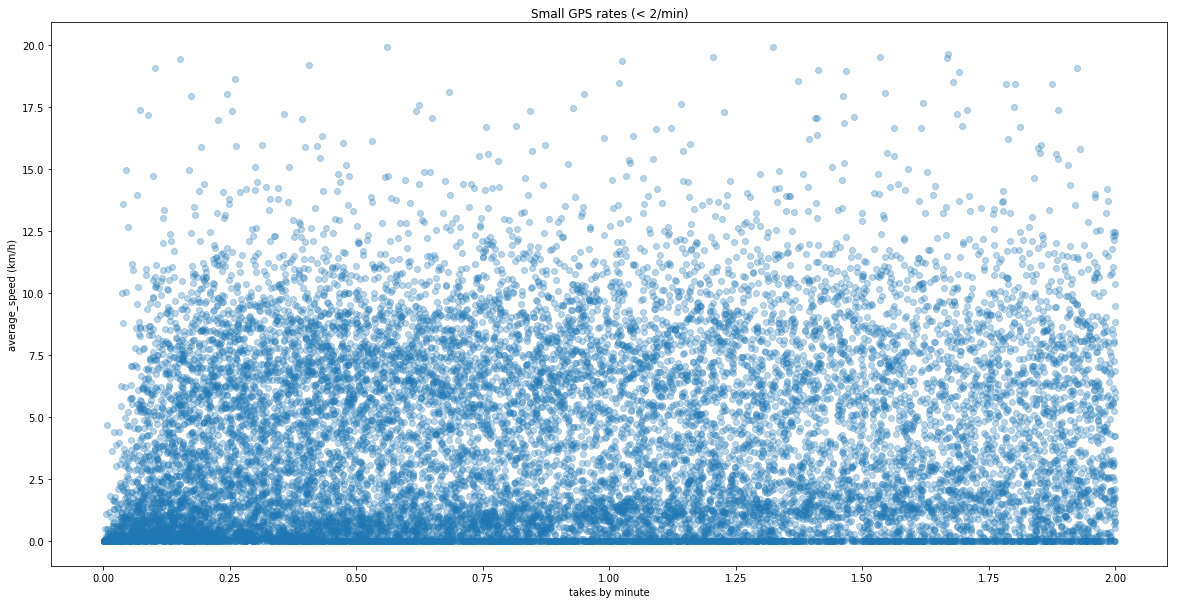

In [67]:
display((small_rates.avg_speed).describe())
selected = small_rates[small_rates.avg_speed < 20]
plt.figure(figsize=(20, 10))
plt.title('Small GPS rates (< 2/min)')
plt.xlabel('takes by minute')
plt.ylabel('average_speed (km/h)')
plt.scatter(selected.takes_by_min, selected.avg_speed, alpha=0.3)
plt.show()

#### Big values
* 20 takes/min = 3 takes/s

In [39]:
big_rates = trips[trips.takes_by_min > 20]
len(big_rates)

22984

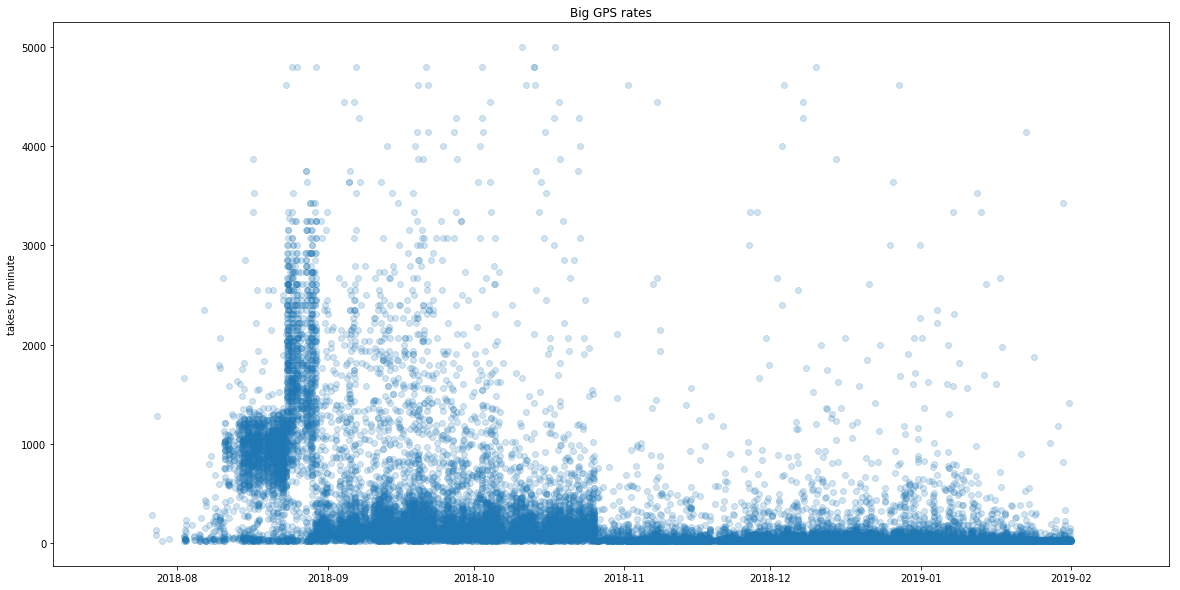

In [12]:
selected = big_rates[big_rates.takes_by_min < 5000]
plt.figure(figsize=(20, 10))
plots.time_scatter(selected.takes_by_min, 'Big GPS rates', 'takes by minute', selected.start_time)
plt.show()

count    22984.000000
mean         3.443973
std         16.500611
min          0.000017
25%          0.008117
50%          0.027450
75%          0.133233
max        589.786200
Name: total_duration, dtype: float64

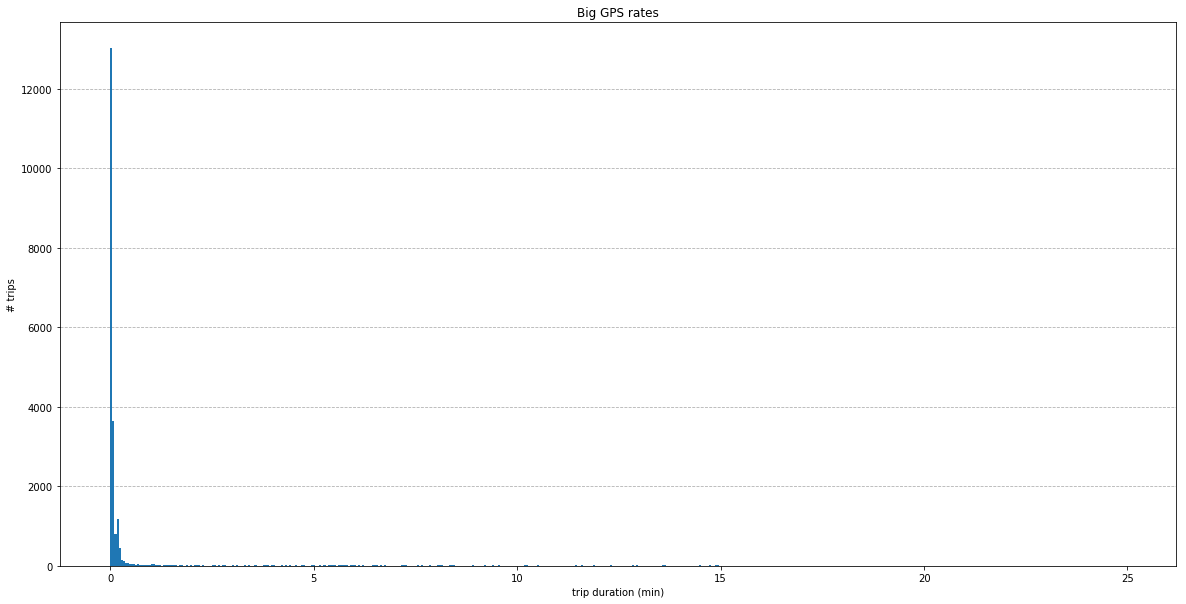

In [75]:
stat = big_rates.total_duration / 60
display(stat.describe())
plt.figure(figsize=(20, 10))
plots.dist_chart(stat[stat < 25], 'Big GPS rates', 'trip duration (min)')
plt.show()

In [14]:
stat = big_rates.total_distance / 1000
display(stat.describe())
plt.figure(figsize=(20, 10))
plots.dist_chart(stat[stat < 10], 'Big GPS rates', 'travelled distance (km)')
plt.show()

count    2.298400e+04
mean     8.355544e-01
std      1.634976e+01
min      3.536620e-13
25%      1.154973e-04
50%      2.048394e-04
75%      1.216725e-02
max      1.986280e+03
Name: total_distance, dtype: float64

count    2.298400e+04
mean     2.888392e+01
std      4.809802e+02
min      6.688569e-12
25%      5.326139e-01
50%      2.119938e+00
75%      6.954099e+00
max      4.955271e+04
Name: avg_speed, dtype: float64

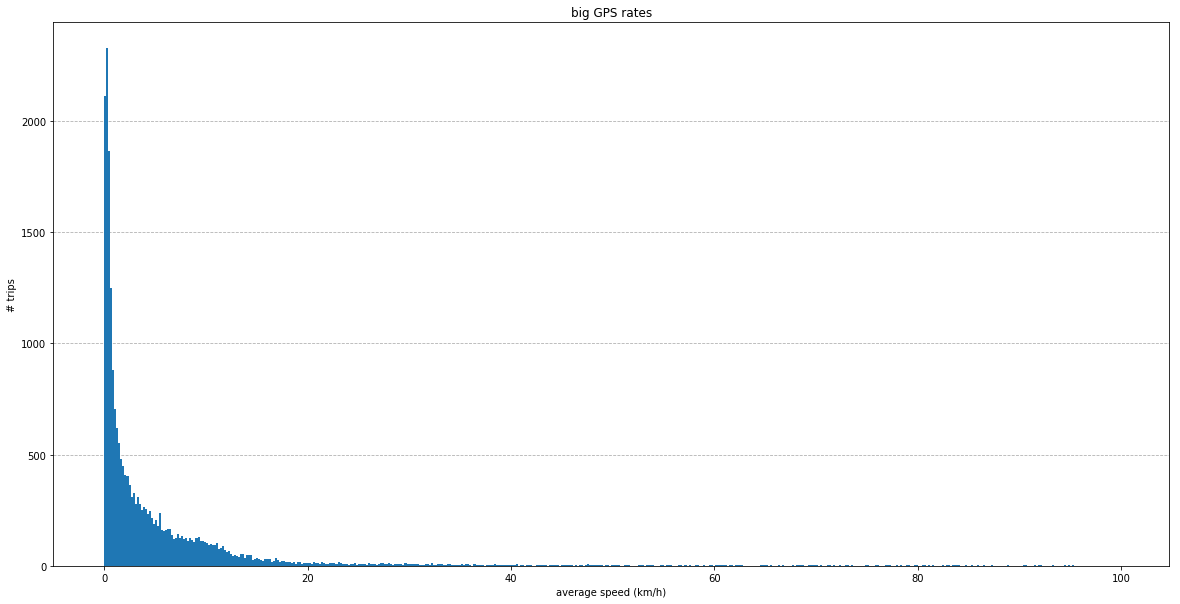

In [15]:
stat = big_rates.avg_speed
display(stat.describe())
plt.figure(figsize=(20, 10))
plots.dist_chart(stat[stat < 100], 'big GPS rates', 'average speed (km/h)')
plt.show()

### The 'good' trips
* From Oct 25, 2018
* Above 1 minute and 50m

In [76]:
filtered = trips[(trips.total_duration > 60) & (trips.total_distance > 50) &
                 (trips.start_time >= pd.Timestamp('2018-10-25 00:00:00'))]
len(filtered)

234624

count    234624.000000
mean          9.229463
std          11.466848
min           0.000503
25%           6.120826
50%           9.773259
75%          12.048441
max        1446.104580
Name: takes_by_min, dtype: float64

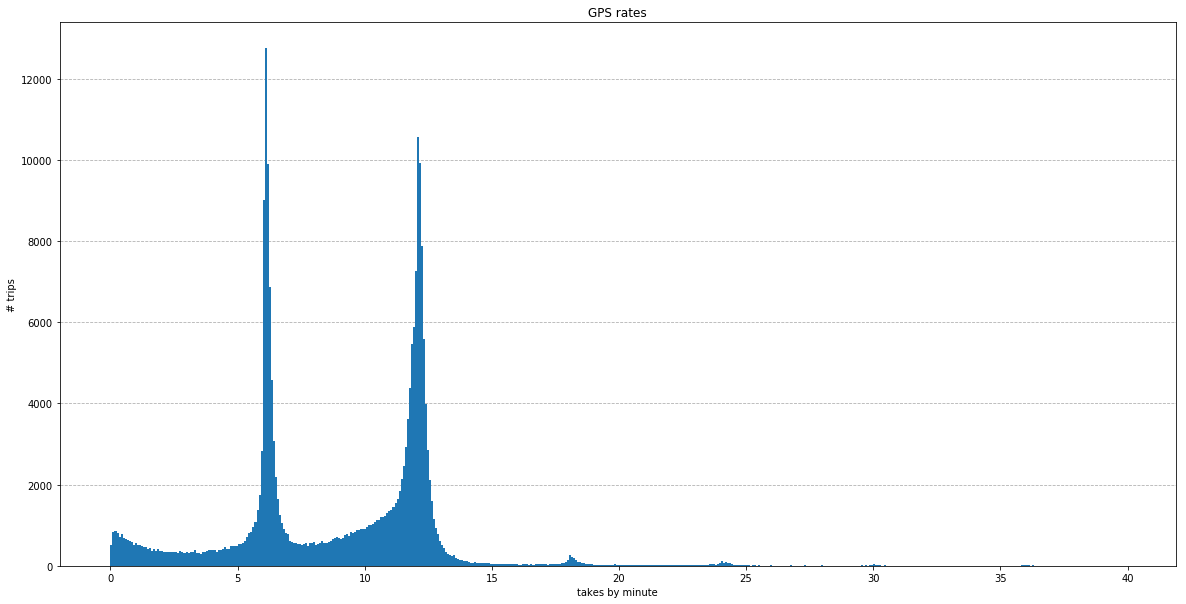

In [77]:
stat = filtered.takes_by_min
display(stat.describe())
plt.figure(figsize=(20, 10))
plots.dist_chart(stat[stat < 40], 'GPS rates', 'takes by minute')
plt.show()

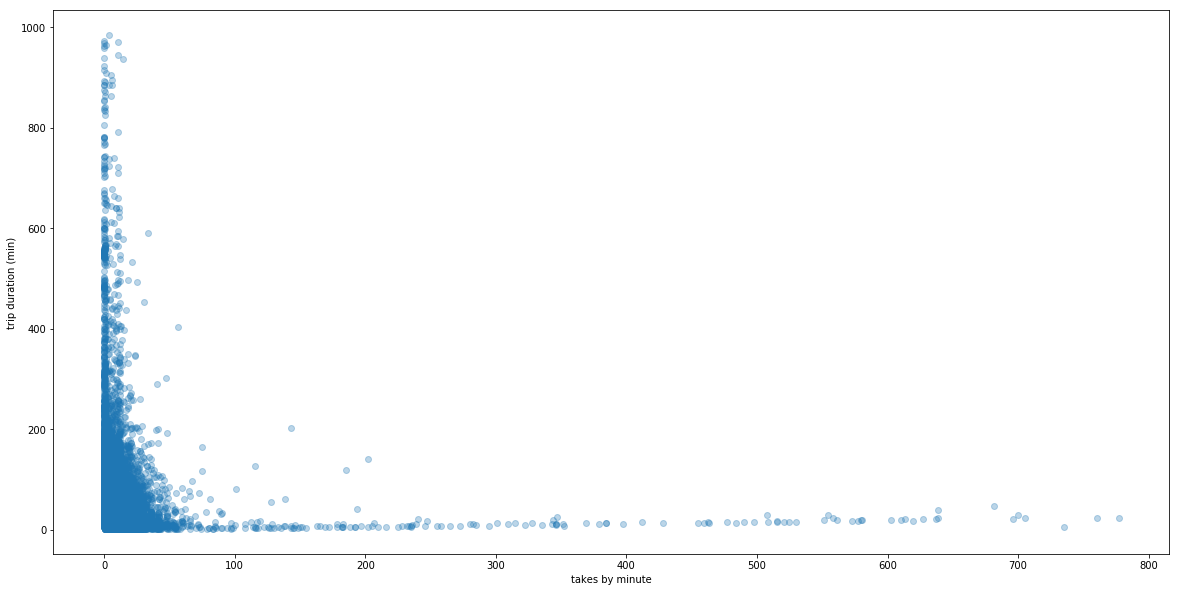

In [48]:
selected = filtered[(filtered.takes_by_min < 800) & (filtered.total_duration < 1000*60)]
plt.figure(figsize=(20, 10))
plt.xlabel('takes by minute')
plt.ylabel('trip duration (min)')
plt.scatter(selected.takes_by_min, selected.total_duration/60, alpha=0.3)
plt.show()

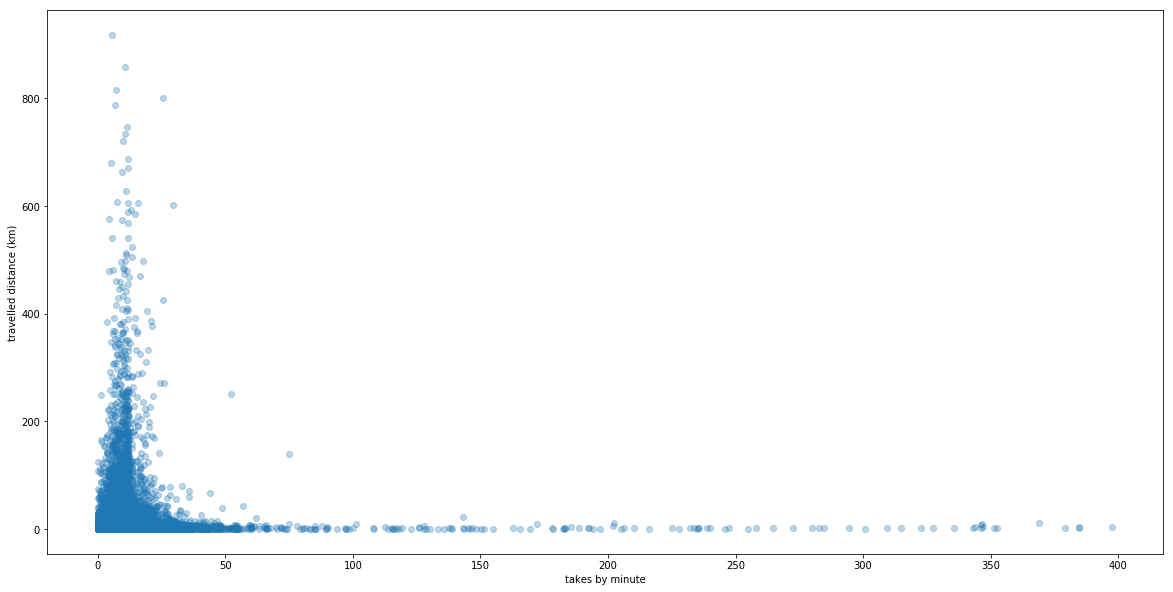

In [79]:
selected = filtered[(filtered.takes_by_min < 400) & (filtered.total_distance < 1000*1000)]
plt.figure(figsize=(20, 10))
plt.xlabel('takes by minute')
plt.ylabel('travelled distance (km)')
plt.scatter(selected.takes_by_min, selected.total_distance/1000, alpha=0.3)
plt.show()

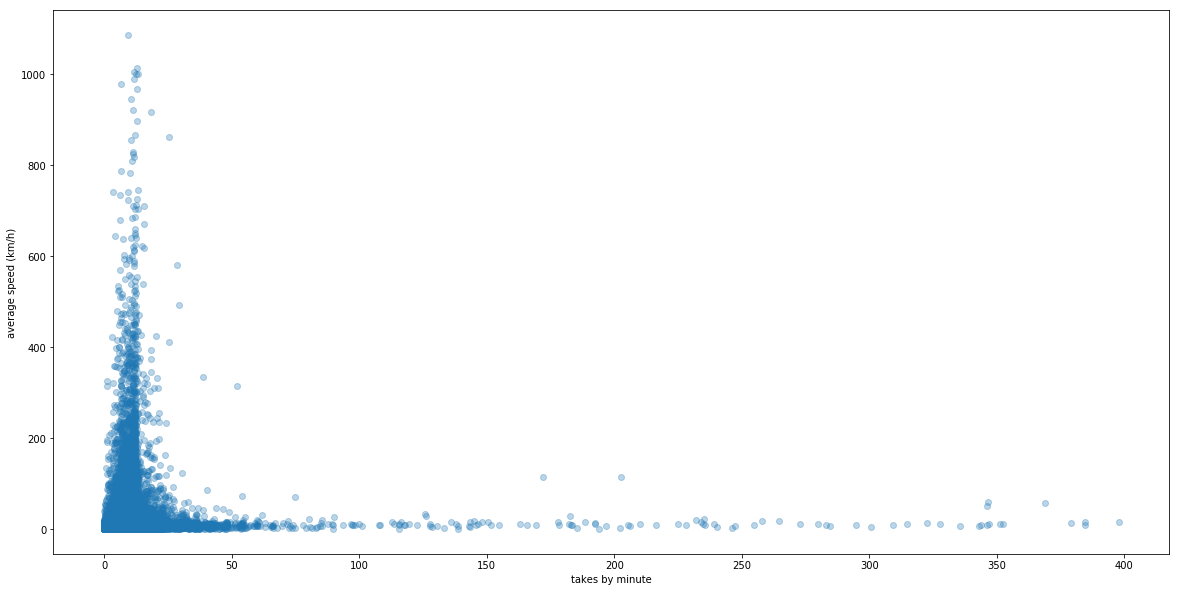

In [81]:
selected = filtered[(filtered.takes_by_min < 400) & (filtered.avg_speed < 1100)]
plt.figure(figsize=(20, 10))
plt.xlabel('takes by minute')
plt.ylabel('average speed (km/h)')
plt.scatter(selected.takes_by_min, selected.avg_speed, alpha=0.3)
plt.show()

#### Small values

In [82]:
small_rates = filtered[filtered.takes_by_min < 2]
len(small_rates)

14007

count    14007.000000
mean        76.804019
std        634.677739
min          1.017000
25%         10.035300
50%         22.579600
75%         60.033008
max      42621.611833
Name: total_duration, dtype: float64

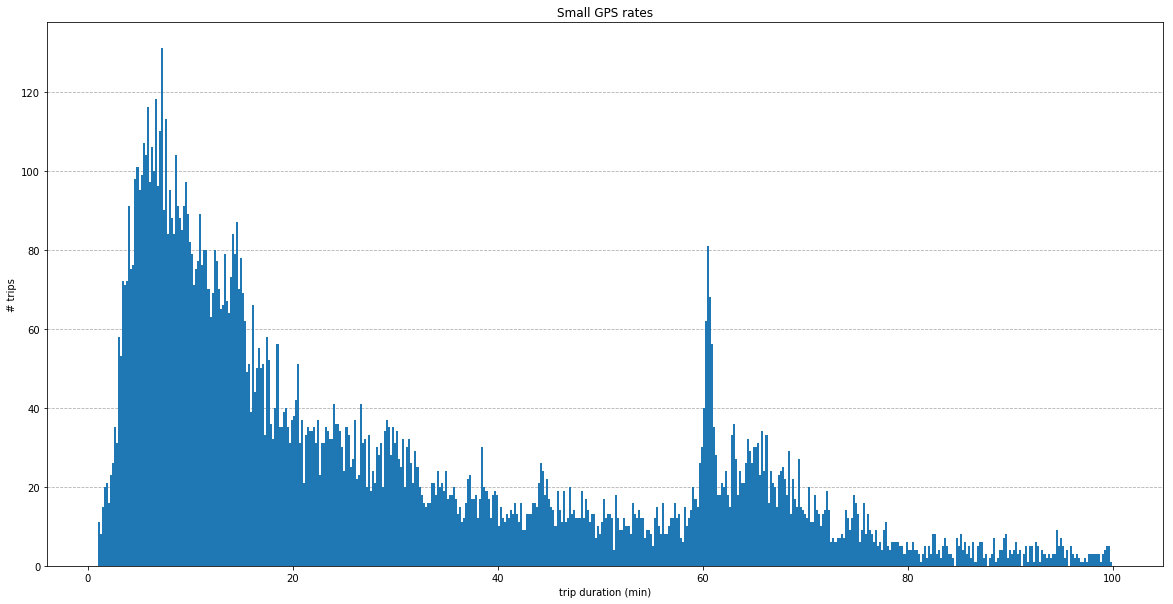

In [43]:
stat = small_rates.total_duration / 60
display(stat.describe())
plt.figure(figsize=(20, 10))
plots.dist_chart(stat[stat < 100], 'Small GPS rates', 'trip duration (min)')
plt.show()

In [44]:
stat = small_rates.total_distance / 1000
display(stat.describe())
plt.figure(figsize=(20, 10))
plots.dist_chart(stat[stat < 50], 'Small GPS rates', 'travelled distance (km)')
plt.show()

count    14007.000000
mean         2.234355
std          5.583038
min          0.050095
25%          0.643927
50%          1.187445
75%          2.218207
max        249.852464
Name: total_distance, dtype: float64

In [21]:
stat = small_rates.avg_speed
display(stat.describe())
plt.figure(figsize=(20, 10))
plots.dist_chart(stat[stat < 100], 'Small GPS rates', 'average speed (km/h)')
plt.show()

count    14007.000000
mean         4.935181
std          7.186268
min          0.001221
25%          1.404409
50%          4.083500
75%          7.218485
max        326.078570
Name: avg_speed, dtype: float64

#### Big values

In [22]:
big_rates = filtered[filtered.takes_by_min > 20]
len(big_rates)

2959

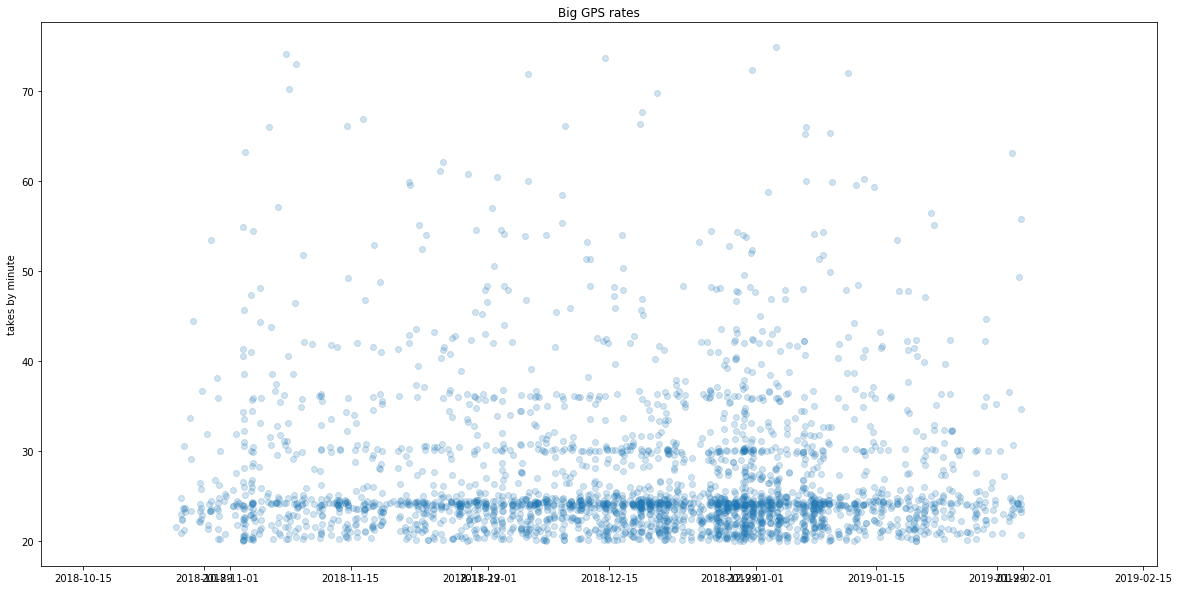

In [23]:
selected = big_rates[big_rates.takes_by_min < 75]
plt.figure(figsize=(20, 10))
plots.time_scatter(selected.takes_by_min, 'Big GPS rates', 'takes by minute', selected.start_time)
plt.show()

count    2959.000000
mean       26.191412
std        38.975659
min         1.003950
25%         6.117025
50%        12.859217
75%        30.150367
max       589.786200
Name: total_duration, dtype: float64

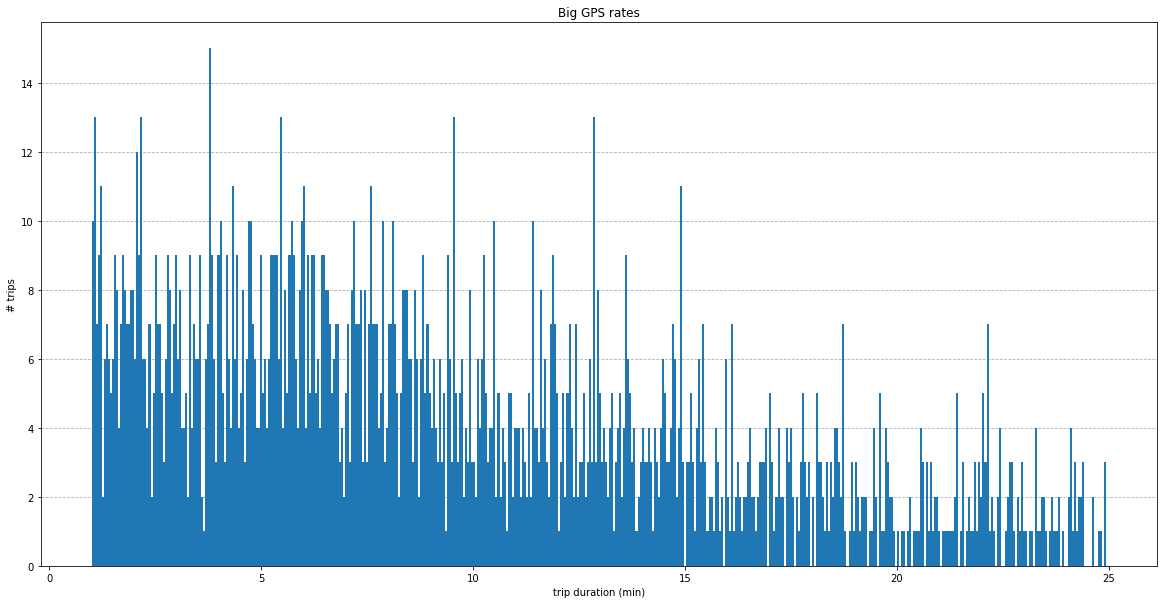

In [24]:
stat = big_rates.total_duration / 60
display(stat.describe())
plt.figure(figsize=(20, 10))
plots.dist_chart(stat[stat < 25], 'Big GPS rates', 'trip duration (min)')
plt.show()

count    2959.000000
mean        6.390030
std        45.181147
min         0.050998
25%         0.866033
50%         1.910765
75%         4.184603
max      1986.279830
Name: total_distance, dtype: float64

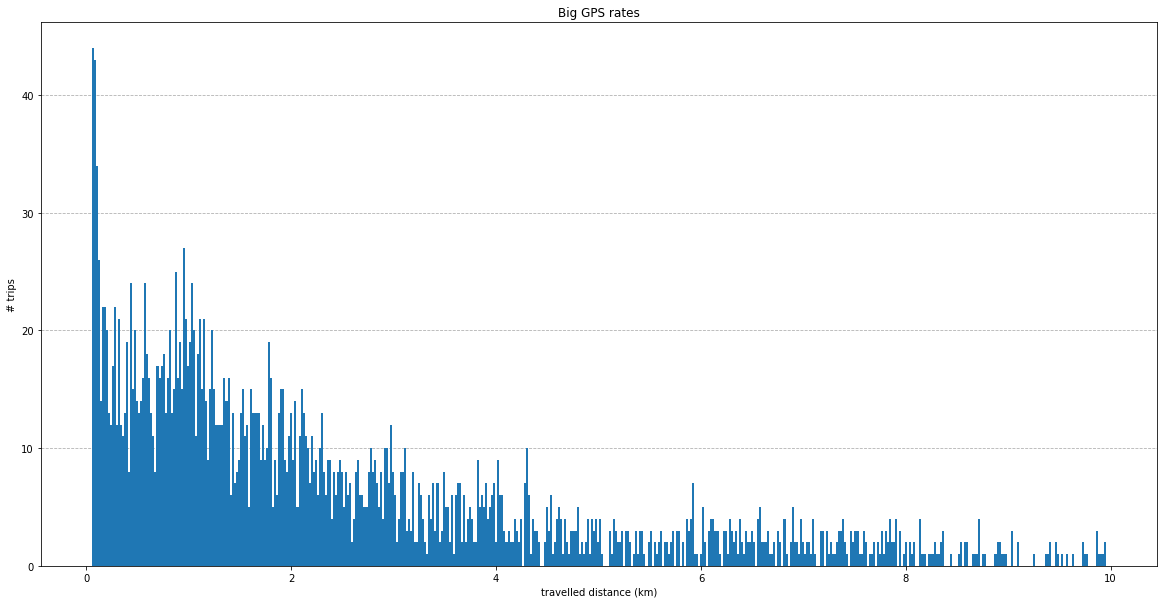

In [25]:
stat = big_rates.total_distance / 1000
display(stat.describe())
plt.figure(figsize=(20, 10))
plots.dist_chart(stat[stat < 10], 'Big GPS rates', 'travelled distance (km)')
plt.show()

In [26]:
stat = big_rates.avg_speed
display(stat.describe())
plt.figure(figsize=(20, 10))
plots.dist_chart(stat[stat < 100], 'big GPS rates', 'average speed (km/h)')
plt.show()

count    2959.000000
mean       12.324764
std        30.068603
min         0.127549
25%         5.813816
50%         8.880235
75%        11.596259
max       863.262104
Name: avg_speed, dtype: float64